# Analysis Of Ukraine Airspace Aircrafts


![](https://i.imgur.com/j9YbbZJ.jpg)

## Outline

* During the UKRAINE invasion of Russia this data is beign collected to make track of aircrafts that are lifted in air.
* This Dataset contains data regarding the ukraine airspace from  2/22/2022     till now and the data is getting updated automataically.
* This data set contains more than 4 million rows with 17 columns to track every aircraft that are flying from this airspace.
* We can also discover which aircrafts are performing better and also which country aircrafts are more reliable.

#### NOTE: This is a dynamic dataset which is getting updated very frequently so there might be change in columns and Data.


## Download and Read the Data


In [ ]:
flighturl='https://www.kaggle.com/datasets/rtwillett/ukrainian-airspace'

In [ ]:
pip install opendatasets --quiet

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np

In [ ]:
flight_csv=od.download(flighturl)

Skipping, found downloaded files in "./ukrainian-airspace" (use force=True to force download)


In [ ]:
flight_df=pd.read_csv('ukrainian-airspace/ukraineflights.csv',nrows=100000)

In [ ]:
flight_df


5110c8  ATG2101               Estonia  2022-02-22 15:28:35  \
0      4248ef   SVR522        United Kingdom  2022-02-22 15:28:36   
1      471f8c  WZZ1550               Hungary  2022-02-22 15:28:28   
2      471f89  WZZ2276               Hungary  2022-02-22 15:28:34   
3      4248e6  SDM6413        United Kingdom  2022-02-22 15:28:35   
4      471f92  WZZ1166               Hungary  2022-02-22 15:28:35   
...       ...      ...                   ...                  ...   
99995  896480    UAE15  United Arab Emirates  2022-02-23 08:21:46   
99996  896451   UAE237  United Arab Emirates  2022-02-23 08:21:46   
99997  424646  AFL2550        United Kingdom  2022-02-23 08:21:46   
99998  42463b  AFL2110        United Kingdom  2022-02-23 08:21:46   
99999  42464d   NWS663        United Kingdom  2022-02-23 08:21:47   

      2022-02-22 15:28:35.1  27.1995  45.5531   4884.42  False  122.59  \
0       2022-02-22 15:28:36  37.7853  55.4932    891.54  False   85.05   
1       2022-02-22 15:28:34  21.2426  45.9153  10668.00  False  231.00   
2       2022-02-22 15:28:34  22.2773  46.0858   8557.26  False  221.14   
3       2022-02-22 15:28:35  45.0040  56.1057  11277.60  False  264.11   
4       2022-02-22 15:28:35  21.5623  46.6558  11285.22  False  232.25   
...                     ...      ...      ...       ...    ...     ...   
99995   2022-02-23 08:21:47  27.9013  43.5312  12192.00  False  250.69   
99996   2022-02-23 08:21:46  29.9083  42.4549   9753.60  False  247.89   
99997   2022-02-23 08:21:46  22.8096  55.5299  10355.58  False  217.11   
99998   2022-02-23 08:21:46  21.9974  48.4703  10058.40  False  256.08   
99999   2022-02-23 08:21:47  24.4641  56.1606   9753.60  False  224.29   

       224.49   0.0  Unnamed: 12   4823.46    5565  False.1  0  
0      145.35 -4.88          NaN    746.76    10.0    False  0  
1      111.42 -0.33          NaN  10553.70  6405.0    False  0  
2      102.90 -9.75          NaN   8473.44  4362.0    False  0  
3       92.23  0.00          NaN  10850.88   734.0    False  0  
4       84.02  0.33          NaN  11170.92   447.0    False  0  
...       ...   ...          ...       ...     ...      ... ..  
99995  305.65  0.00          NaN  12146.28  3274.0    False  0  
99996  290.28  0.00          NaN   9707.88  3224.0    False  0  
99997  278.86  0.00          NaN   9997.44  3531.0    False  0  
99998  175.16  0.00          NaN   9944.10  6263.0    False  0  
99999  204.10  0.00          NaN   9372.60  4670.0    False  0  

[100000 rows x 17 columns]

## Data Preparation and Cleaning

In [ ]:
flight_df.columns=['ICAO_24','callsign','origin_country','time_at_position',
                   'time_of_last_contact','longitude','latitude','barometric_altitude',
                   'aircraft_is_grounded','velocity','heading','vertical_rate','sensors',
                   'geo_altitude','squawk','spi','position_source']

In [ ]:
flight_df

ICAO_24 callsign        origin_country     time_at_position  \
0      4248ef   SVR522        United Kingdom  2022-02-22 15:28:36   
1      471f8c  WZZ1550               Hungary  2022-02-22 15:28:28   
2      471f89  WZZ2276               Hungary  2022-02-22 15:28:34   
3      4248e6  SDM6413        United Kingdom  2022-02-22 15:28:35   
4      471f92  WZZ1166               Hungary  2022-02-22 15:28:35   
...       ...      ...                   ...                  ...   
99995  896480    UAE15  United Arab Emirates  2022-02-23 08:21:46   
99996  896451   UAE237  United Arab Emirates  2022-02-23 08:21:46   
99997  424646  AFL2550        United Kingdom  2022-02-23 08:21:46   
99998  42463b  AFL2110        United Kingdom  2022-02-23 08:21:46   
99999  42464d   NWS663        United Kingdom  2022-02-23 08:21:47   

      time_of_last_contact  longitude  latitude  barometric_altitude  \
0      2022-02-22 15:28:36    37.7853   55.4932               891.54   
1      2022-02-22 15:28:34    21.2426   45.9153             10668.00   
2      2022-02-22 15:28:34    22.2773   46.0858              8557.26   
3      2022-02-22 15:28:35    45.0040   56.1057             11277.60   
4      2022-02-22 15:28:35    21.5623   46.6558             11285.22   
...                    ...        ...       ...                  ...   
99995  2022-02-23 08:21:47    27.9013   43.5312             12192.00   
99996  2022-02-23 08:21:46    29.9083   42.4549              9753.60   
99997  2022-02-23 08:21:46    22.8096   55.5299             10355.58   
99998  2022-02-23 08:21:46    21.9974   48.4703             10058.40   
99999  2022-02-23 08:21:47    24.4641   56.1606              9753.60   

       aircraft_is_grounded  velocity  heading  vertical_rate  sensors  \
0                     False     85.05   145.35          -4.88      NaN   
1                     False    231.00   111.42          -0.33      NaN   
2                     False    221.14   102.90          -9.75      NaN   
3                     False    264.11    92.23           0.00      NaN   
4                     False    232.25    84.02           0.33      NaN   
...                     ...       ...      ...            ...      ...   
99995                 False    250.69   305.65           0.00      NaN   
99996                 False    247.89   290.28           0.00      NaN   
99997                 False    217.11   278.86           0.00      NaN   
99998                 False    256.08   175.16           0.00      NaN   
99999                 False    224.29   204.10           0.00      NaN   

       geo_altitude  squawk    spi  position_source  
0            746.76    10.0  False                0  
1          10553.70  6405.0  False                0  
2           8473.44  4362.0  False                0  
3          10850.88   734.0  False                0  
4          11170.92   447.0  False                0  
...             ...     ...    ...              ...  
99995      12146.28  3274.0  False                0  
99996       9707.88  3224.0  False                0  
99997       9997.44  3531.0  False                0  
99998       9944.10  6263.0  False                0  
99999       9372.60  4670.0  False                0  

[100000 rows x 17 columns]

### Small Breif about the columns
1. ICAO_24:The ICAO aircraft type designator is a two-, three- or four-character alphanumeric code designating every aircraft type (and some sub-types) that may appear in flight planning
2. callsign:Call signs can be the registration number of an aircraft, an airline company designated name followed by their flight number
3. Barometric_altitude:The aircraft cruising altitude or flight level is maintained by referencing the barometric altimeter
4. Heading:The direction in which the longitudinal axis of an aircraft is pointed, usually expressed in degrees from North 
5. vertical_rate:A Vertical Speed Indicator (VSI), also known as a Rate of Climb and Descent Indicator (RCDI) is an instrument which indicates the rate of climb or descent of an aircraft measured in ft/min.
6. squawk:In short, SQUAWK refers to the communication that comes from an aircraft's transponder


### Dropping the columns that are not required and doesn't have data.

In [ ]:
flight_df=flight_df.drop(['spi'],axis=1)

In [ ]:

flight_df=flight_df.drop(['position_source'],axis=1)

In [ ]:
flight_df=flight_df.drop(['sensors'],axis=1)

In [ ]:
flight_df=flight_df.drop(['squawk'],axis=1)

### Changing the datatypes of the columns 

In [ ]:
flight_df['time_of_last_contact']=pd.to_datetime(flight_df.time_of_last_contact)

In [ ]:
flight_df['time_at_position']=pd.to_datetime(flight_df.time_at_position)

In [ ]:
flight_df['origin_country']=flight_df.origin_country.astype('string')

### Dealing with the missing values.

In [ ]:
mean_bar=flight_df.barometric_altitude.mean()
flight_df['barometric_altitude']=flight_df.barometric_altitude.fillna(mean_bar)

In [ ]:
mean_geo=flight_df.geo_altitude.mean()
flight_df['geo_altitude']=flight_df.geo_altitude.fillna(mean_geo)

In [ ]:
flight_df.dropna(subset=['callsign'],inplace=True)

In [ ]:
flight_df.dropna(subset=['velocity'],inplace=True)

In [ ]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99320 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ICAO_24               99320 non-null  object        
 1   callsign              99320 non-null  object        
 2   origin_country        99320 non-null  string        
 3   time_at_position      99320 non-null  datetime64[ns]
 4   time_of_last_contact  99320 non-null  datetime64[ns]
 5   longitude             99320 non-null  float64       
 6   latitude              99320 non-null  float64       
 7   barometric_altitude   99320 non-null  float64       
 8   aircraft_is_grounded  99320 non-null  bool          
 9   velocity              99320 non-null  float64       
 10  heading               99320 non-null  float64       
 11  vertical_rate         97338 non-null  float64       
 12  geo_altitude          99320 non-null  float64       
dtypes: bool(1), date

In [ ]:
flight_df.isna().sum()

ICAO_24                    0
callsign                   0
origin_country             0
time_at_position           0
time_of_last_contact       0
longitude                  0
latitude                   0
barometric_altitude        0
aircraft_is_grounded       0
velocity                   0
heading                    0
vertical_rate           1982
geo_altitude               0
dtype: int64

### Analysing data using Visualisation tools

* Some visuatisation tools we use in this project are 
 1. matplotlib
 2.seaborn
 3.folium
 4.plotly

In [ ]:
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
from folium.plugins import HeatMap

## Open Ended questions

### How many different aircrafts are present?

In [ ]:
aircraft_group=flight_df.groupby('ICAO_24',as_index=False).first()
sns.set_style('darkgrid')
#plt.figure(figsize=(12,6))
fig=px.histogram(x=aircraft_group.ICAO_24,y=flight_df.ICAO_24.value_counts(),title='Total no. of aircrafts');
fig.update_layout(xaxis_title='Aircrafts ',
                  yaxis_title='count of Aircrafts'
                  )
fig.show()

* In the above graph we can interpret number of aircrafts are present according to ICAF number
* count started from over 300 to as low as 1 aircraft

### What was the minimum and maximum altitude reached by Aircrafts?

Text(0, 0.5, 'geo_altitude')

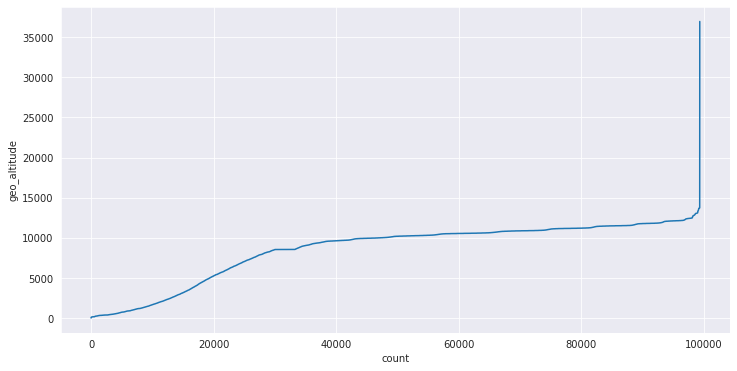

In [ ]:
alti=flight_df.geo_altitude.sort_values(ascending=True,)
plt.figure(figsize=(12,6))
plt.plot(range(len(alti)),alti);
plt.xlabel('count')
plt.ylabel('geo_altitude')



* There is a gradual increase of altitude starting from 0 to over 35000 
* Until 15000 there has been a gradual increase from that point we can see a sudden spike in the altitude

### What was the minimum and the maximum velocity ?

Text(0, 0.5, 'velocity')

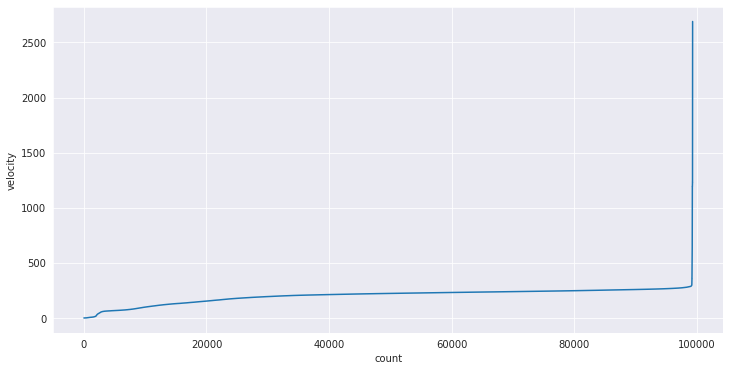

In [ ]:
Vel=flight_df.velocity.sort_values(ascending=True,)
plt.figure(figsize=(12,6))
plt.plot(range(len(Vel)),Vel)
plt.xlabel('count')
plt.ylabel('velocity')

* There is a gradual increase of velocity starting from 0 to over 2500
* Until 500 there has been a gradual increase from that point we can see a sudden spike in the velocity

## Ask and Answer the Questions

### Q1:In which part of the country most aircrafts are flying?

In [ ]:
#sample_df=flight_df(int(0.01*len(flight_df)))
lat_lon_pair=list(zip(list(flight_df.latitude),list(flight_df.longitude)))

In [ ]:
map=folium.Map(location=[48.3794,31.1656],zoom_start=4)
HeatMap(lat_lon_pair).add_to(map)
map

* In the above map we have provided the latitude and longitutde of the aircrafts present in this airbase so we plotted the positions and which part of the country most of the aircrafts are flying.
* From the map we can see that the most aircrafts are flying on the west&North part of the country.
* Only particular parts of the east ukraine is covered by the aircrafts,south and Middle parts are partially covered because of the oceans and other country borderrs

### Q2:How many number of aircrafts according to the country or origin?

In [ ]:
country_counts = flight_df.origin_country.value_counts()
country_counts_df = pd.DataFrame({ 'Country': country_counts.index, 'Count': country_counts.values})
country_counts_df

Country  Count
0         United Kingdom  29857
1                 Turkey  12843
2   United Arab Emirates   5247
3     Russian Federation   4148
4                Hungary   4095
..                   ...    ...
63           Afghanistan     17
64                 Japan     16
65               Denmark     16
66               Lebanon      7
67               Armenia      5

[68 rows x 2 columns]

In [ ]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

In [ ]:
myscale=np.linspace(country_counts_df['Count'].min(),country_counts_df['Count'].max(),10)
m = folium.Map(location=[30, 0], zoom_start=2)

folium.Choropleth(
    geo_data=country_shapes,
    data=country_counts_df,
    columns=["Country", "Count"],
    key_on="feature.properties.name",
    threshold_scale=myscale,
    nan_fill_color='gray',
    nan_fill_opacity=0.20,
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.5,
    reset=True,
    coloraxis_colorbar_y=0.26,
    legend_name='Number of Aircrafts by country',
).add_to(m)

m

* In this above choropleth map we can analyze that the origin if aircrafts that are build and also number of aircrafts from different countries
* We can see that the most aircrafts originated from United kingdom followed by Turkey,United arab etc.,
* In the above map it indicates that country with dark colour are given with higher aircrafts and country with light colour is less aircrafts

In [ ]:
flight_df.columns

Index(['ICAO_24', 'callsign', 'origin_country', 'time_at_position',
       'time_of_last_contact', 'longitude', 'latitude', 'barometric_altitude',
       'aircraft_is_grounded', 'velocity', 'heading', 'vertical_rate',
       'geo_altitude'],
      dtype='object')

### Q3:Find out top aircrafts with highes velocity and altitude?

In [ ]:
flight_df.shape

(99320, 13)

In [ ]:
updated_df=flight_df[(flight_df.geo_altitude<=15000)&(flight_df.velocity<=1500)]
updated_df['velocity']=updated_df.velocity.sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig=px.scatter(updated_df.head(1000),y='velocity',x='geo_altitude',color='ICAO_24',size='velocity',opacity=.5)
fig.update_layout(xaxis_title='GEO_Altitude',
                  yaxis_title='Velocity(Knots)',
                  title='Velocity vs Altitude of Aircraft',
                  font_color='brown',
                  title_font_color='green',
                  font=dict(size=16))
fig.show()

* In this above scatter plot we are analysing the relation between velocity and geo_altitude i.e velocity at a particular altitude and aircraft is mentioned with colour x-axis with altitude and y-axis with velocity
* we were picking top 1000 aircrafts with highest velocity along with the altitude
* If we observe the graph the plots were almost linearly increasing as the velocity of the aircraft increases the altitude also will increase substantially
* Most of the aircrafts are maintaining higher altitudes with higher speeds

### Q4:Findout what percentage of aircrafts are grounded?

In [ ]:

fig=px.pie(flight_df,names='aircraft_is_grounded',title='Percentage of aircrafts Grounded',hole=.4)
fig.update_layout(legend_title='Aircrafts Grounded?')
fig.show()

* In the above pie chart it was mentioned that during their lifetime aircrafts starts to  crumble and disengage so it has to be grounded for safety so this shows how much percentage of aircrafts are being grounded
* We can observe that only 2.07% of 100000 aircrafts are grounded so from these we can get that most of the aircrafts are working sound 

### 5:Which are the bottom aircrafts with least altitude when they first contacted the base?

In [ ]:
flight_df_copy=flight_df.copy()

In [ ]:
flight_df_copy['time']=flight_df_copy.time_of_last_contact.dt.time.sort_values(ascending=False)
flight_df_copy['date']=flight_df_copy.time_of_last_contact.dt.date

In [ ]:
flight_df_copy['date']=flight_df_copy.date.astype('string')

In [ ]:
fig=px.scatter(flight_df_copy.sort_values(by=['barometric_altitude'],ascending=True).head(1000),x='time',y='barometric_altitude',hover_data=['date'],color='callsign',animation_frame='date',size='barometric_altitude',opacity=.5)
fig.update_layout(xaxis_title='Time of last contact',
                  yaxis_title='barometic altitude',
                  title='Time vs Altitude of aircraft',
                  font_color='red',
                  title_font_color='violet')
fig.show()


* In this above scatter plot we can get to know the bottom 1000 aircrarfts with highest altitude at the time of last contact to the base.
* During every routine checkup of an aircraft inside any base altitude and last point of contact and the position of the aircraft will be mentioned in case of any emergency
* In the above graph we can see that some planes are maintaining the same altitude after multiple contacts with the base.
* Most of the aircrafts gaining their altitude on each contact with the base or some of the aircrafts are losing the altitude on last contact with the base.
* So as we were speaking about the bottom aircrafts we had reading on two days in which some planes are maintaining in lower altitudes all the times but there is change in altitude over time in 1st day over 2nd 

### Q6:what is the average velocity of the aircraft respect to country?

In [ ]:
mean_copy=flight_df_copy.groupby('origin_country',as_index=False).mean()
mean_copy

origin_country  longitude   latitude  barometric_altitude  \
0            Afghanistan  34.173382  42.496065         10058.400000   
1                Albania  24.518125  42.075675         10017.252000   
2                Armenia  44.171500  42.018100         11010.900000   
3                Austria  25.177844  47.503007          9222.268546   
4             Azerbaijan  31.580740  46.958922         10435.939124   
..                   ...        ...        ...                  ...   
63  United Arab Emirates  27.256817  45.115694         10804.534976   
64        United Kingdom  37.159468  54.346614          7561.928150   
65         United States  24.992684  48.186943          8977.887983   
66            Uzbekistan  40.698355  53.333473          8817.582901   
67              Viet Nam  40.832111  56.018164          9307.068000   

    aircraft_is_grounded    velocity     heading  vertical_rate  geo_altitude  
0               0.000000  255.501765   96.098824      -0.058235   9976.372941  
1               0.000000  216.016250  268.229000       0.536000   9921.811500  
2               0.000000  223.140000  351.510000       4.550000  10972.800000  
3               0.058402  197.675058  192.840496       0.000526   8990.974244  
4               0.000000  242.355936  149.011793      -0.032590  10308.220637  
..                   ...         ...         ...            ...           ...  
63              0.000381  239.195643  202.178702       0.033082  10689.923931  
64              0.002411  190.678297  194.976627       0.250222   7231.926087  
65              0.027567  183.867524  176.131107      -0.151685   8840.867014  
66              0.001333  202.404493  213.161707       0.140547   8662.442474  
67              0.000000  240.828444  110.385111       4.747778   8951.468000  

[68 rows x 9 columns]

In [ ]:
fig=px.line(mean_copy,
           x='origin_country',y='velocity'
           )
fig.update_layout(xaxis_title='origin Country',
                  yaxis_title='average velocity(knots)',
                  title='average velocity ',
                  font_color='brown',
                  title_font_color='red',
                  legend_title='Aircraft',
                  )
fig.show()

* In this above bargraph we are analyzing the relation between velocity of the aircraft with the aircraft last time of contact as it is important because if there was any emergency it will be veryuseful to calculate the path and direction of the plane might landed
* Here in the above graph we have most of the countries with marginal average speed only few country aircrafts average is less for example denmarks average is nearly 62 but the highest is standing at 257 knots for japan and most countries aircrafts are maintaining the at 200 and around

### Q7:In which direction the plane was heading towards and what was the altitude of the aircraft according to the country?

In [ ]:
fig = px.scatter_polar(flight_df, 
                    theta="heading",
                    r="geo_altitude", 
                    color="origin_country",
                    template="plotly_dark",
                    animation_frame='origin_country')
fig.update_layout(title='Direction with altitude')
fig.show()

* So in this above scatter polar graph we are analyzing between heading(the direction of the plane in degrees) and altitude of the aircrafts and coloured it according to the country.
* From this visualisation we can get to know which country aircraft is heading in which direction and the altitude 
* From the above scatter we can also conculude that most of aircraft irrespective of their country they are flying at higher altitudes(>8000)and also at 90deg and 270deg angle direction
* we have a slider to check altitude with the direction of different countries

### Q8:what is the average vertical rate of the aircraft that is descending or ascending or going constant

In [ ]:
vertical_rate_mean=flight_df.groupby('ICAO_24',as_index=False).mean()

In [ ]:
fig=px.histogram(vertical_rate_mean,y='vertical_rate',x='ICAO_24')
fig.update_layout(title='vertical Rate of Aircraft',
                  xaxis_title='Aircrafts',
                  yaxis_title='average Vertical rate',
                  font_color='green',
                  )
fig.show()

* In the above histogram graph we can get the average verticalrate of the every aircraft whether it is descending or ascending 
* we can observe that most of the aircrafts are climbing its verticalrate rather than descent.
* Moreover the ascent is nearly reaching 20ft/min but the descent is -10ft/min so ascending is much faster than descending

# Summary and Conclusion
* This Dataset is Getting updated frequently and there is change in the data along with the columns 
* we can use this notebook to track the aircrafts using its callsign or ICAO number or using the country of origin
* From this project you can know the average altitude,average speed in knots along with the direction of the aircrafts flying.
* We can able to analyze countries with higher number of aircrafts originated.
* we can get insights regarding the overall performance of the aircrafts by analyzing the aspects mentioned like velocity,altitude ,direction,squawk performance.
* From the above data we can also able to find out how often aircrafts are being communicated with the base
* we can procure data for each aircrafts how often the altitude and directions along with the velocity is differing at each time of contact with the base.
* we also got to know that most of the aircrafts are originated from UK and are more efficient.

### NOTE:In this project we took only 1lakh rows of data and the visualisations will vary with change in data


# Future Works

1. squawk position according to air craft
2. what is the direction of the aircraft and the vertical rate during the base contact.
3. We can calculate the difference between the time of contact and last point of contact according to the aircraft.
4. Once the position source column gets updated we can calculate the position of aircraft and also point of contact.
5. Is there any change in the altitude between first and last contact with the aircraft  
6. what is the average velocity,altitude of the aircraft when it last contacted the base

# References
1. [Jovian](https://jovian.ai/) 
2. [Kaggle](https://www.kaggle.com/)
3. [stack over flow](https://stackoverflow.com/)
4. [geeks for geeks](https://www.geeksforgeeks.org/)
5. [euras](https://eurasiantimes.com/us-war-planes-proposed-for-ukraine-could-be-sitting-ducks/)

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [1]:
# Execute this to save new versions of the notebook
jovian.commit(project="new-project")

NameError: ignored